In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [13]:
df1 = pd.read_csv("./drive/MyDrive/portsmouth/IceCreamData.csv")
df1.head()

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [14]:
X1 = np.array(df1['Temperature']).reshape(-1,1)
y1 = df1['Revenue']

In [15]:
linreg1 = LinearRegression()
linreg1.fit(X1,y1)
linreg1.score(X1, y1)

0.979707200117581

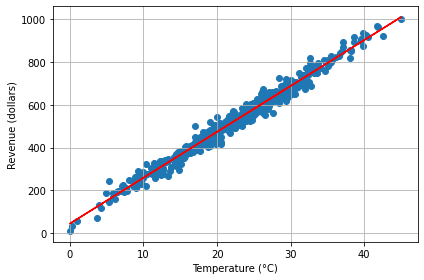

In [25]:
plt.figure()
plt.scatter(X1, y1)
plt.plot(X1, linreg1.predict(X1), color='red')
plt.grid()
xlabel = plt.xlabel(u'Temperature (\N{DEGREE SIGN}C)')
ylabel = plt.ylabel('Revenue (dollars)')
plt.tight_layout()

In [26]:
df2 = pd.read_csv("./drive/MyDrive/portsmouth/CarPrice_Assignment.csv")
df2

car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19         25  22625.0

[205 rows x 26 columns]

In [18]:
df2.describe()

car_ID   symboling   wheelbase  ...     citympg  highwaympg         price
count  205.000000  205.000000  205.000000  ...  205.000000  205.000000    205.000000
mean   103.000000    0.834146   98.756585  ...   25.219512   30.751220  13276.710571
std     59.322565    1.245307    6.021776  ...    6.542142    6.886443   7988.852332
min      1.000000   -2.000000   86.600000  ...   13.000000   16.000000   5118.000000
25%     52.000000    0.000000   94.500000  ...   19.000000   25.000000   7788.000000
50%    103.000000    1.000000   97.000000  ...   24.000000   30.000000  10295.000000
75%    154.000000    2.000000  102.400000  ...   30.000000   34.000000  16503.000000
max    205.000000    3.000000  120.900000  ...   49.000000   54.000000  45400.000000

[8 rows x 16 columns]

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [56]:
X2 = df2.drop(['car_ID','price'], axis=1)
y2 = df2['price']
categories = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

In [57]:
enc_lab = LabelEncoder()

X2_lab = X2.copy()
for column in X2.columns:
  X2_lab[column] = enc_lab.fit_transform(X2_lab[column])

linreg_label = LinearRegression()
linreg_label.fit(X2_lab,y2)
linreg_label.score(X2_lab, y2)

0.8526830428519951

In [130]:
enc_oh = OneHotEncoder()

X2_object = X2[[column for column in X2.columns if X2[column].dtype == object]]
X2_encoded_array = enc_oh.fit_transform(X2_object).toarray()
columns = [column for sublist in [['_'.join([X2_object.columns[i], c]) for c in enc_oh.categories_[i]] for i in range(len(enc_oh.categories_))] for column in sublist]

X2_oh = pd.merge(
    X2.drop(X2_object.columns, axis=1),
    pd.DataFrame(X2_encoded_array, columns=columns),
    left_index=True,
    right_index=True
)

linreg_oh = LinearRegression()
linreg_oh.fit(X2_oh,y2)
linreg_oh.score(X2_oh, y2)

0.9970655594822811

In [158]:
[X2_oh.columns[i] for i in range(len(X2_oh.columns)) if linreg_oh.coef_[i] == max(linreg_oh.coef_)]

['CarName_bmw x5']

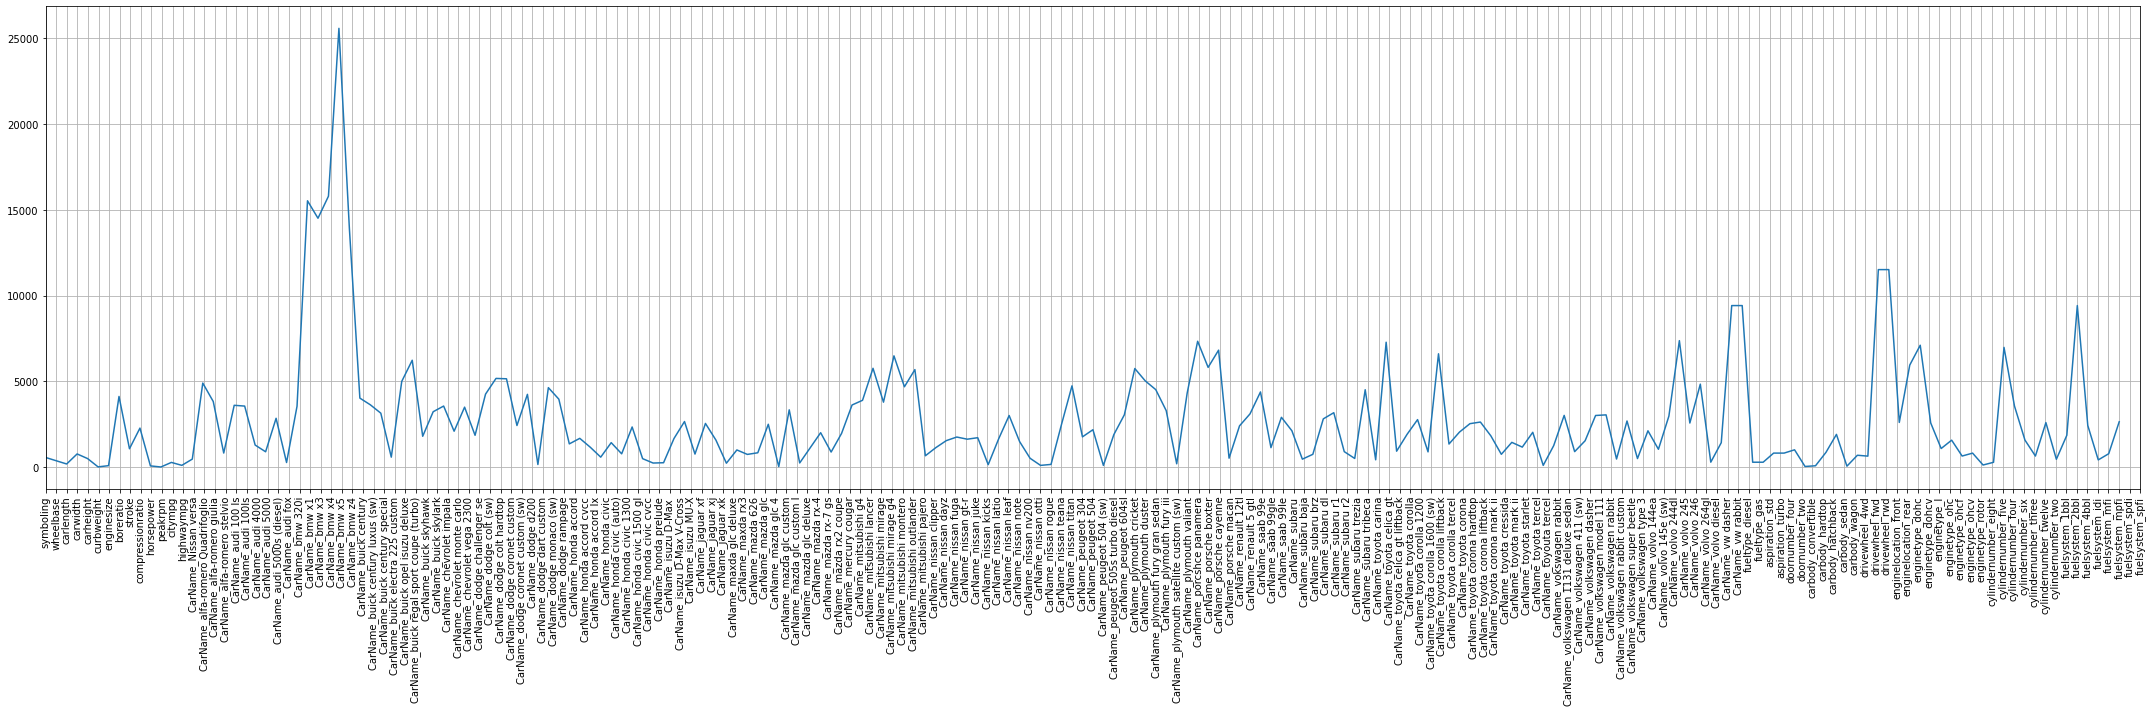

In [154]:
plt.figure(figsize=(30,10))
plt.plot(abs(linreg_oh.coef_))
xlabel = plt.xticks(ticks = np.linspace(0, 200, 199), labels = X2_oh.columns, rotation=90)
plt.xlim(0,200)
plt.tight_layout()
plt.grid()